In [1]:
# Import for data manipulation
import pandas as pd 
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ast

from scipy.stats import f_oneway

# import re for regular expression
import re

# scikit-learn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.impute import SimpleImputer


# Import package for sentiment analysis
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [2]:
# Download for sentiment analysis
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ealopez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ealopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Data Cleaning

In [4]:
df_habits = pd.read_csv('grocery_habits.csv')
df_habits = df_habits.drop(columns = 'Timestamp')

In [5]:
df_habits = df_habits.rename(columns={"Timestamp": "Time"})
df_habits = df_habits.rename(columns={"Email Address": "Email"})
df_habits = df_habits.rename(columns={"Are you comfortable with us reaching out for some quick followup questions? Say yes if you're awesome and epic.": "Followup"})
df_habits = df_habits.rename(columns={"Who do you typically grocery shop groceries for?" : "Audience"})
df_habits = df_habits.rename(columns={"How often do you go grocery shopping?" : "Frequency"})
df_habits = df_habits.rename(columns={"Do you prefer to shop at a specific grocery store or multiple stores?" : "Number of Stores"})
df_habits = df_habits.rename(columns={"What kind of grocery store do you usually shop at ?" : "Type of Store"})
df_habits = df_habits.rename(columns={"Walk me through your grocery shopping process/describe your typical shopping experience (ex: what you buy, what aisles you visit, favorite aisles, time spent, etc)." : "Shopping Process"})
df_habits = df_habits.rename(columns={"How do you know where to go first in a grocery store?" : "Navigating In Store"})
df_habits = df_habits.rename(columns={"Do you have a budget when going grocery shopping?" : "Budget"})
df_habits = df_habits.rename(columns={"Do you usually create a shopping list before going to the grocery store?" : "List"})
df_habits = df_habits.rename(columns={"If you selected digital list, what apps or tools do you use?" : "Digital List Tools"})
df_habits = df_habits.rename(columns={"How often do you stick to your list versus making spontaneous purchases?" : "Stick to List Frequency"})
df_habits = df_habits.rename(columns={"How often do you find yourself throwing away expired food items?" : "Expired Food Frequency"})
df_habits = df_habits.rename(columns={"Why do you think you have this habit?" : "Why Expired"})
df_habits = df_habits.rename(columns={"What do you do with an expired/almost expired item?" : "Use Expired"})
df_habits = df_habits.rename(columns={"What do you most often find yourself throwing away? Please choose two max." : "Common Expired"})
df_habits = df_habits.rename(columns={"How familiar are you with sell by dates and do you know where to find them?" : "Find Sell By"})
df_habits = df_habits.rename(columns={"What methods do you currently use to remember expiration dates on perishable items?" : "Track Expiration"})
df_habits = df_habits.rename(columns={"What challenges or struggles do you currently face when it comes to managing and keeping track of expiration dates?" : "Challenges in Tracking"})
df_habits = df_habits.rename(columns={"Do you believe that you tend to throw away expired food earlier or later than your peers?" : "Relative Amount Expired"})
df_habits = df_habits.rename(columns={"Does most of your food waste come from prepared foods or from groceries themselves?\n\nFun fact: Per 2/4 rule by the FDA, if you put the leftovers in fridge within 2 hours it’s good for 4 days." : "Prepared or Grocery Waste"})
df_habits = df_habits.rename(columns={"If you could come up with a solution to these problems, what would you want?" : "Solution"})
df_habits = df_habits.rename(columns={"Do you already use apps to track groceries' expiration dates?" : "App"})

In [6]:
df_habits.columns

Index(['Email', 'Followup', 'Audience', 'Frequency', 'Number of Stores',
       'Type of Store', 'Shopping Process',
       'How do you know where to go first in a grocery store? \n\nFun fact: Ralph stores have a map and their app can lead you to the aisle your item is located. ',
       'Budget', 'List', 'Digital List Tools', 'Stick to List Frequency',
       'Expired Food Frequency', 'Why Expired', 'Use Expired',
       'Common Expired', 'Find Sell By',
       'Do you usually follow sell by dates?', 'Track Expiration',
       'Challenges in Tracking', 'Relative Amount Expired',
       'Prepared or Grocery Waste', 'Solution', 'App'],
      dtype='object')

In [7]:
#Sentiment Analysis

In [8]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ealopez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# TDIF for column 'Shopping Process'
# Begin preprocessing: lowercasing and removing non-alphanumeric characters
instores = df_habits['Shopping Process']
instores = [re.sub(r'[^A-Za-z0-9]', ' ', process) for process in instores]
instores = [process.lower() for process in instores]

In [10]:
# Begin text analysis
tfidf = TfidfVectorizer(analyzer = 'word', 
                        max_features = 2000,
                        tokenizer = word_tokenize,
                        stop_words = stopwords.words("english"))

In [11]:
tfidf_instores_array = tfidf.fit_transform(instores).toarray()
df_instores = pd.DataFrame(tfidf_instores_array)
df_instores.columns = tfidf.get_feature_names()

/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [12]:
most_unique_instores = df_instores.idxmax(axis = 1)

In [13]:
df_instores = pd.DataFrame(np.sum(df_instores, axis = 0))
df_instores = df_instores.loc['accomplish':]
df_instores_vals = df_instores.loc[:,0]
df_instores['tfidf'] = df_instores_vals
df_instores = df_instores.sort_values(by = 'tfidf', ascending = False)

In [14]:
df_instores = df_instores.loc[:'frozen']
df_instores = df_instores.transpose()

<AxesSubplot:ylabel='Count'>

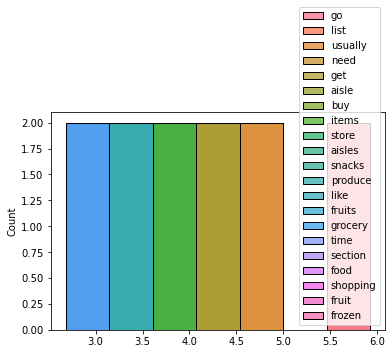

In [16]:
sns.histplot(data = df_instores)
#the word with the highest value is "go" and so on